In [166]:
name = "Yehor"
date_returned = "Write the date returned here"

# Lab 5
**Kinematic equations and trajectories of free fall**<br>
Software 2<br>
Information and Communication Technology<br>
Metropolia University of Applied Sciences

## Setup

Read necessary libraries.

In [167]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

You toss a ball straight up at $7.3\;\text{m/s}$. It leaves your hand at $1.5\;\text{m}$ above a floor (See example at page 7 in Software 1, Orientation Physics lecture notes).

The position of the ball can be modeled with equation $y(t) = y_0 + v_0 t - \frac{1}{2}g t^2$, where

- $y_0$ is the initial position
- $v_0$ is the initial velocity
- $g$ is the acceleration due to gravity (9.81 m/s)
- $t$ is the time.

Draw the graph of the position of the ball over time. Use time step of 0.01 s. Limit the range of t to show only positive values of the position (e.g. when $y(t) \geq 0$).

When does the ball hit the ground? Store the value to variable `t_end` with accuracy of 0.01 s.

What is the highest point of the ball? Store the value to variable `y_max` with two decimals accuracy (in units of meters).

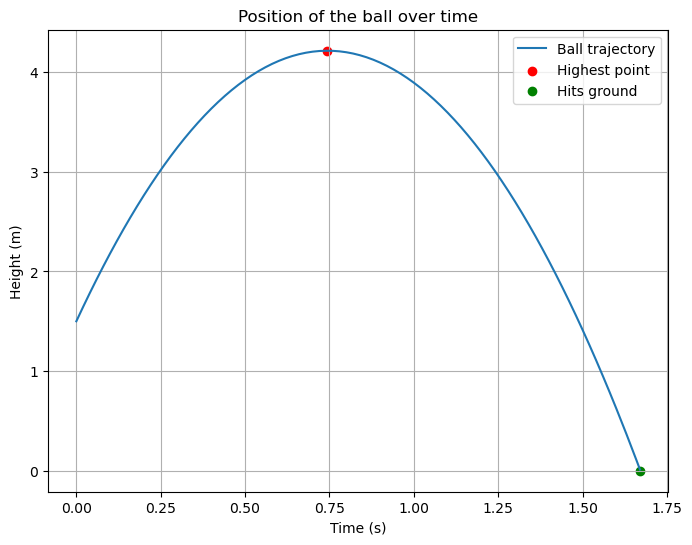

In [168]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
v0 = 7.3
y0 = 1.5
g = 9.81

# Solve quadratic equation for t_end
# Equation: y0 + v0*t - (1/2)*g*t^2 = 0
a = -0.5 * g
b = v0
c = y0

discriminant = b**2 - 4*a*c
t1 = (-b + np.sqrt(discriminant)) / (2*a)
t2 = (-b - np.sqrt(discriminant)) / (2*a)

# Choose the positive time
t_end = t1 if t1 > 0 else t2
# Round to 0.01 s
t_end = round(t_end, 2)

# Create time array from 0 to t_end
t = np.arange(0, t_end + 0.01, 0.01)
y = y0 + v0 * t - 0.5 * g * t**2



# Optional: plot if desired
plt.figure(figsize=(8,6))
plt.plot(t, y, label='Ball trajectory')
plt.title('Position of the ball over time')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.grid(True)

# Marking the highest point
t_max = v0 / g
y_max = y0 + v0*t_max - 0.5*g*t_max**2
y_max_rounded = round(y_max, 2)
plt.scatter(t_max, y_max, color='red', label='Highest point')

# Mark when it hits the ground
plt.scatter(t_end, 0, color='green', label='Hits ground')

plt.legend()
plt.show()



In [169]:
positive_y_mask = y > 0
t_positive = t[positive_y_mask]  
t_end_calc = np.max(t_positive)  
t_end_calc = round(t_end_calc, 2)  
print(f't_end = {t_end_calc} s')

t_end = 1.67 s


## Problem 2

A raging flood has washed away a section of of highway, creating a gash *2.0 m* deep. A car moving at *31 m/s* goes straight over the edge. How far from the edge of the washout does it land?

<img src="./Lab_5_Problem_2.png" alt="A car moving over the edge" width="500" height="600">

(See Software 1, Orientation Physics lecture notes, page 13).

Sketch a graph of the projectile motion (in x-y coordinates) of the car. The projectile motion can be modeled with equations:

$x = x_0 + v_0 \cdot \cos(\theta) \cdot t$<br>

$y = y_0 + v_0 \cdot \sin(\theta) \cdot t - \frac{1}{2}g\cdot t^2$

where

- $x_0, y_0$ is the initial position
- $\theta$ is the angle between x-axis and the initial velocity
- $g$ is the gravitational acceleration ($9.81 \; m/s^2$)
- $t$ is the time

Find the landing position with *0.1 m* accuracy and store the value to variable `x_landing`.

How long is the time of flight? Find the value for that with *10 ms* (= *0.01 s*) accuracy and store it to the variable `t_flight`.

Use the given range of times for calculations. Do not change them.

Limit the x- and y-axis to show the whole trajectory of the motion from the beginning to the landing position.



Decorate the graphics (grid-line, x- and y-axis labels, title).

Assume the starting position ($x_0, y_0$) of the car's flight is (0, 0) in meters.

NOTE: The angle for trigonometric functions (sin, cos, tan) should be given in [radians](https://en.wikipedia.org/wiki/Radian). For that reason we need [np.deg2rad()](https://numpy.org/doc/stable/reference/generated/numpy.deg2rad.html) function to convert the degrees to radians. See also: [Conversions of angles](https://en.wikipedia.org/wiki/Radian#Conversions).

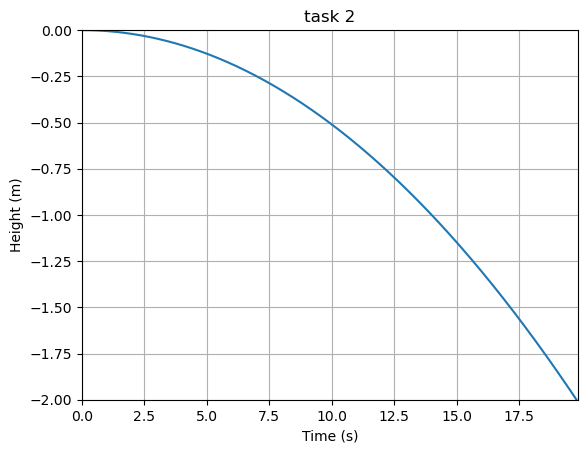

In [170]:
import numpy as np
import matplotlib.pyplot as plt

x0 = 0
y0 = 0
v0 = 31
theta = np.deg2rad(0)
g = 9.81
t = np.arange(0, 1, 0.001)
x = x0+v0*np.cos(theta)*t
y = y0+v0*np.sin(theta)*t-0.5*g*(t**2)
h=2

plt.plot(x, y)
t_flight_index = np.where(y <= -h)[0][0]  
t_flight = t[t_flight_index]  
t_flight=round(t_flight, 2)

x_landing = x[t_flight_index]
x_landing=round(x_landing, 1)
x_max=x_landing
plt.xlim(x0, x_max+0.05) # added 0.05 to improve visibility and moodle passing tests
y_min = -h 
plt.ylim(y_min, y0 )

plt.title("task 2")

plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.grid()
plt.show()



## Problem 3

You are aiming to throw a ball to a target standing on the level (see the graph generated by the code). You stand below the level. The ball leaves your hand 1.3 m above the ground. Find the minimum angle ($\theta$) and speed ($v_0$) to hit the target.

(See also Software 1, Orientation Physics lecture notes, page 14).

Sketch a graph of the projectile motion with time step of 1 ms. Stop counting when it hits the target, e.g. you should end the trajectory data (x, y) to the edge or inside the target area.

Avoid to hit the corner of the level. Leave minimum *2 cm* clearance to the edge.

Use the same projectile motion equations as in the previous problem.

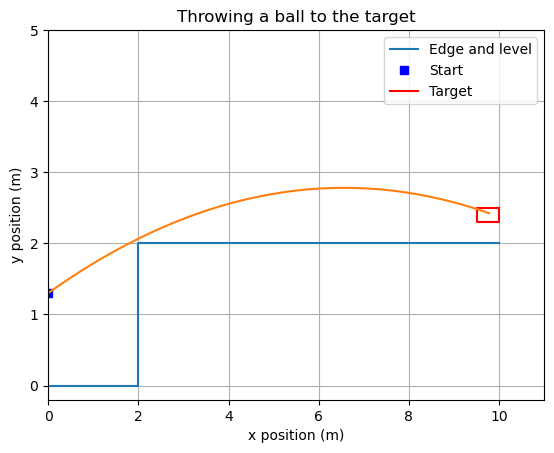

In [171]:
import numpy as np
import matplotlib.pyplot as plt

### DO NOT CHANGE THESE SETTINGS !!! ####
x0, y0 = 0, 1.3
x1 = [10, 9.5, 9.5, 10, 10]
y1 = [2.5, 2.5, 2.3, 2.3, 2.5]
x_edge = [0, 2, 2, 10]
y_edge = [0, 0, 2, 2]

plt.plot(x_edge, y_edge, label = 'Edge and level')
plt.plot(x0, y0, 'bs', label = 'Start')
plt.plot(x1, y1, 'r-', label = 'Target')
plt.grid()
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('Throwing a ball to the target')
plt.legend()
plt.ylim(-0.2, 5) #I would like to change yend lim to at least 4 (instead of 5)
# but okay, I am not changing it because of the comment above :)

### YOUR CODE COMES HERE!! ###
# Set initial velocity and angle to hit the target 
v0 = 13.1  
theta = np.deg2rad(24.3) 

# Time array (0 to 0.82 seconds, step 1ms)
# Tend got from "experiment"
t = np.arange(0, 0.82, 0.001)

# g got with .2 accuracy
g = 9.81

# I will calculate x and y based on t to made xy chart
# Formula to calculate x(t), physics
x = x0 + v0 * np.cos(theta) * t
# Formula to calculate y(t)
y = y0 + v0 * np.sin(theta) * t - 0.5 * g * t**2

# 11 (xend) got from visual
plt.xlim(0,11)

plt.plot(x, y)
plt.show()


---
## Bonus

Below is the same code as in previous problem, but the time step is now changed down to 0.01 s in order to create and show the animation faster. You can play with this code and see how the animation works.

Copy your trajectory motion code from previous problem to the code cell below.

In [172]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

RuntimeError: x must be a sequence

Error in callback <function _draw_all_if_interactive at 0x0000016DE245A5C0> (for post_execute):


RuntimeError: x must be a sequence

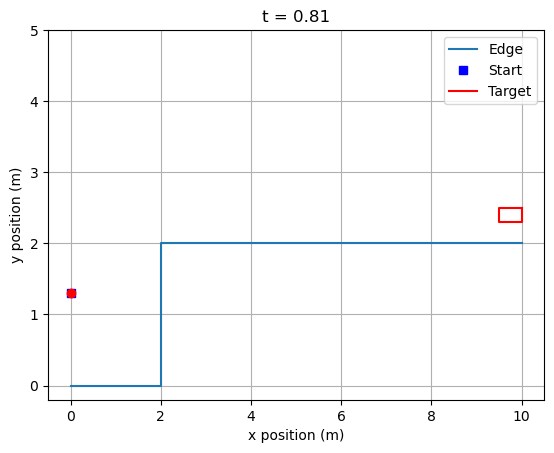

In [173]:
t = np.arange(0, 0.82, 0.01) # Note the time step!

v0 = 13.1  # chosen speed (m/s)
theta = np.deg2rad(24.3)
g = 9.81



### Don't change these ###
### Initial graph
x0, y0 = 0, 1.3
x1 = [10, 9.5, 9.5, 10, 10]
y1 = [2.5, 2.5, 2.3, 2.3, 2.5]
x_edge = [0, 2, 2, 10]
y_edge = [0, 0, 2, 2]


x = x0 + v0 * np.cos(theta) * t
y = y0 + v0 * np.sin(theta) * t - 0.5 * g * t**2


fig, ax = plt.subplots()
plt.sca(ax)
plt.plot(x_edge, y_edge, label = 'Edge')
plt.plot(x0, y0, 'bs', label = 'Start')
plt.plot(x1, y1, 'r-', label = 'Target')
plt.grid()
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('Throwing a ball to the target')
plt.legend()
plt.ylim(-0.2, 5)


# Initialize the position in the graph
l, = ax.plot(x[0],y[0], 'b-')     # Tail of the trajectory
l2, = ax.plot(x[0], y[0], 'ro')   # Position of the ball
ax.set_title(f't = {t[-1]:.2f}')  # Change the title to the elapsed time
plt.grid(True)

# Animation function
def animate(i):
    i0 = max(0, i-10)             # Get 10 points from the data
    l.set_data(x[i0:i], y[i0:i])  # Show the tail
    l2.set_data(x[i], y[i])       # Show the position
    ax.set_title(f't = {t[i]:.2f}') # Update the title

# Create the animation
ani = FuncAnimation(fig, animate, frames=len(t))

# Show animation in Javascript HTML object
HTML(ani.to_jshtml())

# When ready, click the Play-button in the graphics below.

# Animation does not work :_(